# Spotify 2023

Vamos a hacer un analizis de las mas movidas y de los generos

#### Importamos los datos

datos de https://www.kaggle.com/datasets/lehaknarnauli/spotify-datasets?select=tracks.csv


Description :
This dataset contains a comprehensive list of the most famous songs of 2023 as listed on Spotify. The dataset offers a wealth of features beyond what is typically available in similar datasets. It provides insights into each song's attributes, popularity, and presence on various music platforms. The dataset includes information such as track name, artist(s) name, release date, Spotify playlists and charts, streaming statistics, Apple Music presence, Deezer presence, Shazam charts, and various audio features.

Key Features:
track_name: Name of the song
artist(s)_name: Name of the artist(s) of the song
artist_count: Number of artists contributing to the song
released_year: Year when the song was released
released_month: Month when the song was released
released_day: Day of the month when the song was released
in_spotify_playlists: Number of Spotify playlists the song is included in
in_spotify_charts: Presence and rank of the song on Spotify charts
streams: Total number of streams on Spotify
in_apple_playlists: Number of Apple Music playlists the song is included in
in_apple_charts: Presence and rank of the song on Apple Music charts
in_deezer_playlists: Number of Deezer playlists the song is included in
in_deezer_charts: Presence and rank of the song on Deezer charts
in_shazam_charts: Presence and rank of the song on Shazam charts
bpm: Beats per minute, a measure of song tempo
key: Key of the song
mode: Mode of the song (major or minor)
danceability_%: Percentage indicating how suitable the song is for dancing
valence_%: Positivity of the song's musical content
energy_%: Perceived energy level of the song
acousticness_%: Amount of acoustic sound in the song
instrumentalness_%: Amount of instrumental content in the song
liveness_%: Presence of live performance elements
speechiness_%: Amount of spoken words in the song


In [2]:
import numpy as np

def patch_asscalar(a):
    return a.item()

setattr(np, "asscalar", patch_asscalar)
import numpy as np
import kmapper as km
import sklearn
from sklearn import ensemble

In [1]:
import pandas as pd
df = pd.read_csv("5000 Spotify.csv", encoding='ISO-8859-1') # encoding='ISO-8859-1' is used to avoid pandas encoding error

C:\Users\herie\AppData\Local\Temp\ipykernel_18256\2379909674.py:2: DtypeWarning: Columns (0,3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("5000 Spotify.csv", encoding='ISO-8859-1') # encoding='ISO-8859-1' is used to avoid pandas encoding error


### Conocemos nuestra db

In [3]:
df.head(5)

,name,popularity,explicit,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,Peaches (feat. Daniel Caesar & Giveon),100.0,1.0,19/03/2021,0.677,0.696,0.0,-6.181,1.0,0.1190,0.3210,0.000000,0.420,0.464,90.030
1,drivers license,99.0,1.0,08/01/2021,0.585,0.436,10.0,-8.761,1.0,0.0601,0.7210,0.000013,0.105,0.132,143.874
2,Astronaut In The Ocean,98.0,0.0,06/01/2021,0.778,0.695,4.0,-6.865,0.0,0.0913,0.1750,0.000000,0.150,0.472,149.996
3,Save Your Tears,97.0,1.0,20/03/2020,0.680,0.826,0.0,-5.487,1.0,0.0309,0.0212,0.000012,0.543,0.644,118.051
4,telepatÃ­a,97.0,0.0,04/12/2020,0.653,0.524,11.0,-9.016,0.0,0.0502,0.1120,0.000000,0.203,0.553,83.970


In [4]:
df.describe()

,popularity,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,76.417200,0.290600,0.652623,0.646723,5.297400,-6.602535,0.607000,0.098766,0.237581,0.022192,0.172961,0.519885,121.599936
std,4.008785,0.454085,0.149445,0.185105,3.581832,3.043067,0.488466,0.096782,0.253889,0.113023,0.134581,0.235128,29.381572
min,72.000000,0.000000,0.000000,0.000020,0.000000,-40.449000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,0.000000,0.556000,0.532000,2.000000,-7.842500,0.000000,0.037700,0.033175,0.000000,0.093500,0.335000,98.512250
50%,75.000000,0.000000,0.665000,0.666000,5.000000,-6.005500,1.000000,0.057000,0.139000,0.000000,0.120000,0.518000,120.020500
75%,78.000000,1.000000,0.761000,0.788000,8.000000,-4.637000,1.000000,0.116000,0.372250,0.000099,0.206000,0.709250,140.053250
max,100.000000,1.000000,0.980000,0.993000,11.000000,1.317000,1.000000,0.777000,0.996000,1.000000,0.967000,0.985000,220.099000


#### Elegimos las columnas con las caracerísticas relevantes.

Conocemos nuestras columnas.

In [6]:
df.columns

Index(['name', 'popularity', 'explicit', 'release_date', 'danceability',
       'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo'],
      dtype='object')

In [ ]:
generes = df['danceability','energy', 'loudness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo']

In [20]:
from sklearn.preprocessing import MinMaxScaler

df['loudness'] = MinMaxScaler(feature_range=(0, 1)).fit_transform(df[['bpm']])
df['released_year'] = MinMaxScaler(feature_range=(20, 80)).fit_transform(df[['released_year']])
df['streams'] = pd.to_numeric(df['streams'], errors='coerce')

In [9]:
print(df['mode'].unique())

['Major' 'Minor']


Cuando usan el modo menor tienden a ser tristes 

In [10]:
df = df.replace({'Major': 51, 'Minor': 49})

C:\Users\herie\AppData\Local\Temp\ipykernel_24588\1806413930.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({'Major': 51, 'Minor': 49})


Vemos el tipo de los datos

In [11]:
df.dtypes

track_name               object
artist(s)_name           object
artist_count              int64
released_year           float64
released_month            int64
released_day              int64
in_spotify_playlists      int64
in_spotify_charts         int64
streams                  object
in_apple_playlists        int64
in_apple_charts           int64
in_deezer_playlists      object
in_deezer_charts          int64
in_shazam_charts         object
bpm                     float64
key                      object
mode                      int64
danceability_%            int64
valence_%                 int64
energy_%                  int64
acousticness_%            int64
instrumentalness_%        int64
liveness_%                int64
speechiness_%             int64
dtype: object

# Visualizar datos

Visualizamos los datos

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import os

if not os.path.exists('Distributions'):
    os.makedirs('Distributions')

df_sample = df.sample(100, random_state=42)

for feature in feature_names1:
    plt.figure(figsize=(10, 6))
    sns.histplot(df_sample[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.savefig(f'Distributions/{feature}_distribution.png')

In [ ]:
import seaborn as sns
import os
import matplotlib.pyplot as plt

if not os.path.exists('Pairplot'):
    os.makedirs('Pairplot')


n=10
pairplot = sns.pairplot(df.sample(n)[feature_names1])
plt.savefig(f'Pairplot/pairplot{n}.png')

In [ ]:
# import seaborn as sns
# import os
# import matplotlib.pyplot as plt

# if not os.path.exists('Pairplotfn2'):
#     os.makedirs('Pairplotfn2')


# n=10
# pairplot = sns.pairplot(df.sample(n)[masmovidas])
# plt.savefig(f'Pairplotfn2/pairplot{n}.png')

In [ ]:
import numpy as np
import plotly.graph_objects as go
import plotly.io as py
import os

def create_3d_scatter(x_col, y_col, z_col):
    fig = go.Figure(data=[go.Scatter3d(
        x=df[x_col],
        y=df[y_col],
        z=df[z_col],
        mode='markers',
        marker=dict(
            size=3,
            color=df[z_col],
            colorscale='Viridis',   
            opacity=0.5
        ),
        text=df['track_name'],  # Change this to the column that contains the names of the points
        hoverinfo='text'  # Display the hover text
    )])

    title = f'{x_col}, {y_col}, {z_col}'
    fig.update_layout(
        title=title,
        scene = dict(
            xaxis = dict(title = x_col, showbackground=False),
            yaxis = dict(title = y_col,showbackground=False),
            zaxis = dict(title = z_col,showbackground=False),
        ),
        margin=dict(l=0, r=0, b=0, t=0)
    )
    
    current_dir = os.getcwd()
    subfolder = '3D Scatter plot'
    filename = os.path.join(current_dir, subfolder, title.replace(' ', '_') + '.html')
    os.makedirs(os.path.dirname(filename), exist_ok=True)
    py.write_html(fig, filename)

    fig.show()

Los puntos mas negativos son, personas de edad corta, que deben mucho, tienen poco salario base mensual :c y viceversa

In [ ]:
create_3d_scatter('Outstanding_Debt', 'Monthly_Inhand_Salary', 'Changed_Credit_Limit')

# Más movidas 

In [ ]:
create_3d_scatter('energy_%', 'bpm', 'danceability_%')

JAJAJAJA mmm... no concuerdo mucho con estas cosas

In [ ]:
masmovidas = ['energy_%', 'bpm', 'danceability_%']
MasMovidas = np.array(df[masmovidas])
TrackName = np.array(df['track_name'])

In [ ]:
mapper = km.KeplerMapper(verbose=0)

#### DBSCAN

In [ ]:
import os

#########
eps = 20
min_samples = 1
n_cubes = 50
perc_overlap = .6

lens = mapper.fit_transform(MasMovidas)

graph = mapper.map(
    lens,
    MasMovidas,
    clusterer=sklearn.cluster.DBSCAN(eps=eps, min_samples=min_samples),
    cover=km.Cover(n_cubes=n_cubes, perc_overlap=perc_overlap),
)

current_dir = os.getcwd()
subfolder = 'Más Movidas/DBSCAN'
filename = os.path.join(current_dir, subfolder, f"eps{eps},min_samples{min_samples},n_cubes{n_cubes},perc_overlap{perc_overlap}.html")
os.makedirs(os.path.dirname(filename), exist_ok=True)
mapper.visualize(graph,
                 path_html=filename,
                 custom_tooltips=TrackName,
                 title=f"Más movidas eps{eps},min_samples{min_samples},n_cubes{n_cubes},perc_overlap{perc_overlap}")

#### K Mens

JAJHAJA quiero canciones para dormir y canciones para despertar

In [ ]:
lens = mapper.fit_transform(MasMovidas)

n_clusters = 2
n_cubes = 30
perc_overlap = .80

graph = mapper.map(
    lens,
    MasMovidas,
    clusterer=sklearn.cluster.KMeans(n_clusters=n_clusters, random_state=11),
    cover=km.Cover(n_cubes=n_cubes, perc_overlap=perc_overlap),
)

current_dir = os.getcwd()
subfolder = 'Más Movidas/K Means'
filename = os.path.join(current_dir, subfolder, f"n_clusters{n_clusters},n_cubes{n_cubes},perc_overlap{perc_overlap}.html")
os.makedirs(os.path.dirname(filename), exist_ok=True)
mapper.visualize(graph,
                 path_html=filename,
                 custom_tooltips=TrackName,
                 title=f"n_clusters{n_clusters},n_cubes{n_cubes},n_cubes{n_cubes},perc_overlap{perc_overlap}")

In [ ]:
from sklearn.neighbors import KernelDensity
import os

eps = 15
min_samples = 5
n_cubes = 2
perc_overlap = 0.5
bandwidth = 0.9

mapper=km.KeplerMapper(verbose=1)
lens = mapper.fit_transform(Generos, projection=KernelDensity(kernel='gaussian',bandwidth=bandwidth))

graph = mapper.map(
    lens,
    Generos,
    clusterer=sklearn.cluster.DBSCAN(eps=eps, min_samples=min_samples),
    cover=km.Cover(n_cubes=n_cubes, perc_overlap=perc_overlap),
)

current_dir = os.getcwd()
subfolder = 'Géneros/Kenel Density'
filename = os.path.join(current_dir, subfolder, f"eps{eps},min_samples{min_samples},n_cubes{n_cubes},perc_overlap_{perc_overlap}, bandwidth{bandwidth}.html")
os.makedirs(os.path.dirname(filename), exist_ok=True)
mapper.visualize(graph,
                 path_html=filename,
                 custom_tooltips=TrackName,
                 title=f"eps{eps},min_samples{min_samples},n_cubes{n_cubes},perc_overlap_{perc_overlap}")

# Géneros

In [21]:
generos = ["bpm", "danceability_%", "valence_%", "energy_%", "liveness_%",
           "acousticness_%", "instrumentalness_%", "speechiness_%", "mode", "released_year"]

Generos = np.array(df[generos])
TrackName = np.array(df['track_name'])

In [13]:
print(df[generos].dtypes)

bpm                   float64
danceability_%          int64
valence_%               int64
energy_%                int64
liveness_%              int64
acousticness_%          int64
instrumentalness_%      int64
speechiness_%           int64
mode                    int64
released_year         float64
dtype: object


In [14]:
mapper = km.KeplerMapper(verbose=0)

#### K Means

c:\Users\herie\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\herie\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


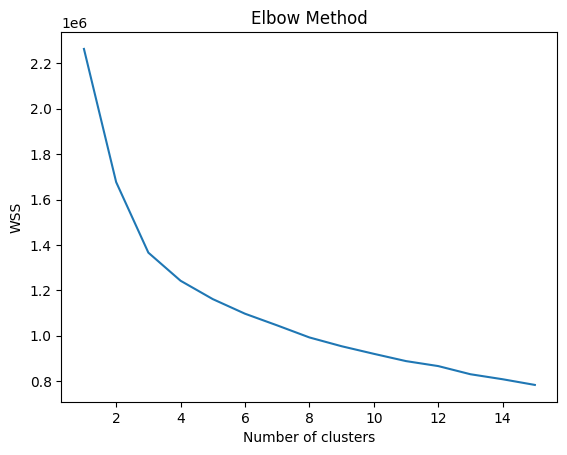

In [15]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

data = df[generos]

wss = []
for i in range(1, 16):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(data)
    wss.append(kmeans.inertia_)

plt.plot(range(1, 16), wss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WSS')
plt.show()

In [25]:
import os
import numpy as np

color_function = df['streams'].values
color_function = (color_function - np.min(color_function)) / (np.max(color_function) - np.min(color_function))

lens = mapper.fit_transform(Generos)

n_clusters = 8
n_cubes = 50
perc_overlap = .3

graph = mapper.map(
    lens,
    Generos,
    clusterer=sklearn.cluster.KMeans(n_clusters=n_clusters, random_state=11),
    cover=km.Cover(n_cubes=n_cubes, perc_overlap=perc_overlap),
)

current_dir = os.getcwd()
subfolder = 'Géneros/K Means'
filename = os.path.join(current_dir, subfolder, f"an_clusters{n_clusters},n_cubes{n_cubes},perc_overlap{perc_overlap}.html")
os.makedirs(os.path.dirname(filename), exist_ok=True)
mapper.visualize(graph,
                 path_html=filename,
                 custom_tooltips=TrackName,
                 title=f"n_clusters{n_clusters},n_cubes{n_cubes},n_cubes{n_cubes},perc_overlap{perc_overlap}")

'<!DOCTYPE html>\n<html>\n\n<head>\n  <meta charset="utf-8">\n  <meta name="generator" content="KeplerMapper">\n  <title>n_clusters8,n_cubes50,n_cubes50,perc_overlap0.3 | KeplerMapper</title>\n\n  <link rel="icon" type="image/png" href="http://i.imgur.com/axOG6GJ.jpg" />\n\n  <link href=\'https://fonts.googleapis.com/css?family=Roboto+Mono:700,300\' rel=\'stylesheet\' type=\'text/css\'>\n  <style>* {\n  margin: 0;\n  padding: 0;\n}\n\nhtml, body {\n  height: 100%;\n}\n\nbody {\n  font-family: "Roboto Mono", "Helvetica", sans-serif;\n  font-size: 14px;\n}\n\n#logo {\n  width:  85px;\n  height: 85px;\n}\n\n#display {\n  color: #95A5A6;\n  background: #212121;\n}\n\n#header {\n  background: #111111;\n}\n\n#print {\n  color: #000;\n  background: #FFF;\n}\n\nh1 {\n  font-size: 21px;\n  font-weight: 300;\n  font-weight: 300;\n}\n\nh2 {\n  font-size: 18px;\n  padding-bottom: 20px;\n  font-weight: 300;\n}\n\nh3 {\n  font-size: 14px;\n  font-weight: 700;\n  text-transform: uppercase;\n}\n\nh4 {

#### Kernel Density

In [ ]:
from sklearn.neighbors import KernelDensity
import os

eps = 15
min_samples = 5
n_cubes = 2
perc_overlap = 0.5
bandwidth = 0.9

mapper=km.KeplerMapper(verbose=1)
lens = mapper.fit_transform(Generos, projection=KernelDensity(kernel='gaussian',bandwidth=bandwidth))

graph = mapper.map(
    lens,
    Generos,
    clusterer=sklearn.cluster.DBSCAN(eps=eps, min_samples=min_samples),
    cover=km.Cover(n_cubes=n_cubes, perc_overlap=perc_overlap),
)

current_dir = os.getcwd()
subfolder = 'Géneros/Kenel Density'
filename = os.path.join(current_dir, subfolder, f"eps{eps},min_samples{min_samples},n_cubes{n_cubes},perc_overlap_{perc_overlap}, bandwidth{bandwidth}.html")
os.makedirs(os.path.dirname(filename), exist_ok=True)
mapper.visualize(graph,
                 path_html=filename,
                 custom_tooltips=TrackName,
                 title=f"eps{eps},min_samples{min_samples},n_cubes{n_cubes},perc_overlap_{perc_overlap}")